# Data analysis for predicting housing prices in California

For this analysis we will use "California Housing Prices" dataset from the StatLib repository.

# Data Set information:

This dataset was based on data from the 1990 California census. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). I will refer to these blocks as “districts” for short.



# Some Useful methods and libraries

In [1]:
#Let's import all that will be needed
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import os
#Some methods useful for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
sns.set()

cwd = os.getcwd()

# We first import the data we will be working with from github

In [3]:
cwd = os.getcwd()
data = os.path.join(cwd,"datasets/housing/housing.csv")
df = pd.read_csv(data)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [189]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


Let's do some data visualization

In [33]:
df.ocean_proximity[df.ocean_proximity =="<1H OCEAN"] = "OCEAN"
print(list(df.ocean_proximity.unique()))

['NEAR BAY', 'OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [190]:
df.ocean_proximity.unique()

array(['NEAR BAY', 'OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype=object)

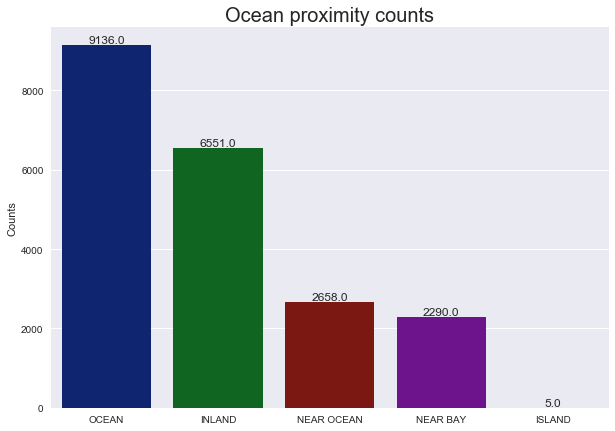

In [172]:
# cat_oc_prox = list(df.ocean_proximity.unique())
sns.set(style = "darkgrid")
rel_location = df.ocean_proximity

plt.figure(figsize = (10,7))

#We define our colors
categories = df.ocean_proximity.unique()
newcategories = [categories[1], categories[2], categories[3], categories[0], categories[4]]

colors = {}
for cat, color in zip(newcategories,sns.color_palette("dark",5)):
    colors[cat] = color
mycolors = df["ocean_proximity"].apply(lambda x : colors[x])

#We plot
g = sns.barplot(x=rel_location.value_counts().index, y=rel_location.value_counts(), palette = "dark")
g.set(ylabel = "Counts")
for p in g.patches:
    g.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Ocean proximity counts", fontsize = 20)
plt.savefig("Location")

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


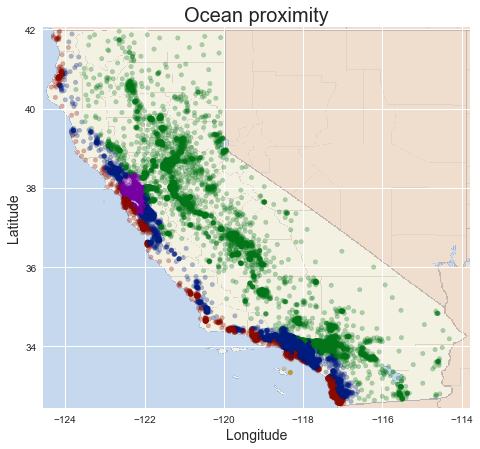

In [171]:

california_img=mpimg.imread("california.png")
#Scatter of house prices

axprox = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), alpha = 0.3, 
    c=mycolors)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#California image as background
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.title("Ocean proximity", fontsize = 20)
plt.legend(fontsize=16)
plt.savefig("Housing_proximity")
plt.show()

We can gain a good insight by analysing the most expensive median_house_value in relation to ocean_proximity

In [10]:
HousingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


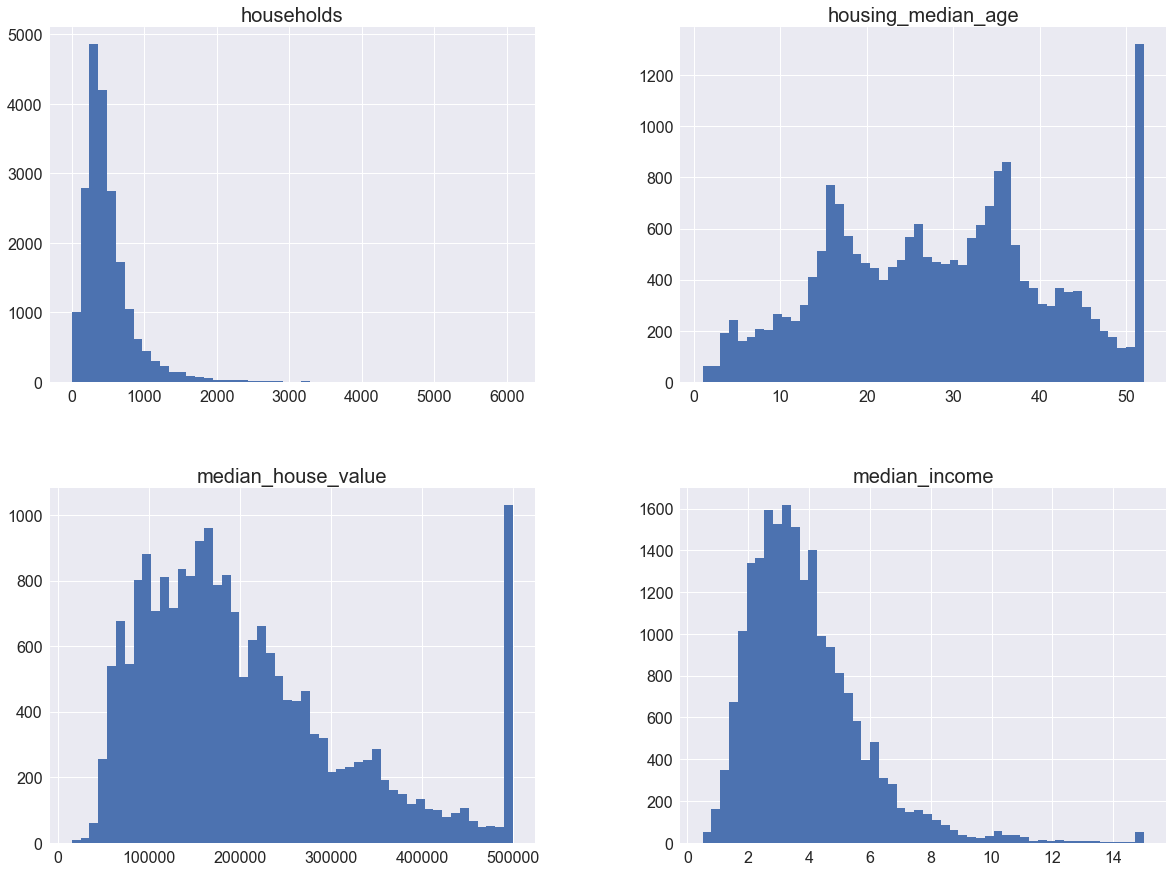

In [204]:
dfnocoord = df.drop(["longitude", "total_rooms", "population"], axis = 1)
dfnocoord["total_rooms (x100)"] = df.total_rooms/100
dfnocoord["population (x100)"] = df.population/100
dfnocoord[["households", "housing_median_age", "median_house_value", "median_income"]].hist(bins=50,figsize=(20,15))
params = {'axes.titlesize':'20',
          'xtick.labelsize':'16',
          'ytick.labelsize':'16'}
plt.rcParams.update(params)
plt.savefig("Distributionshouse_income")
plt.show()

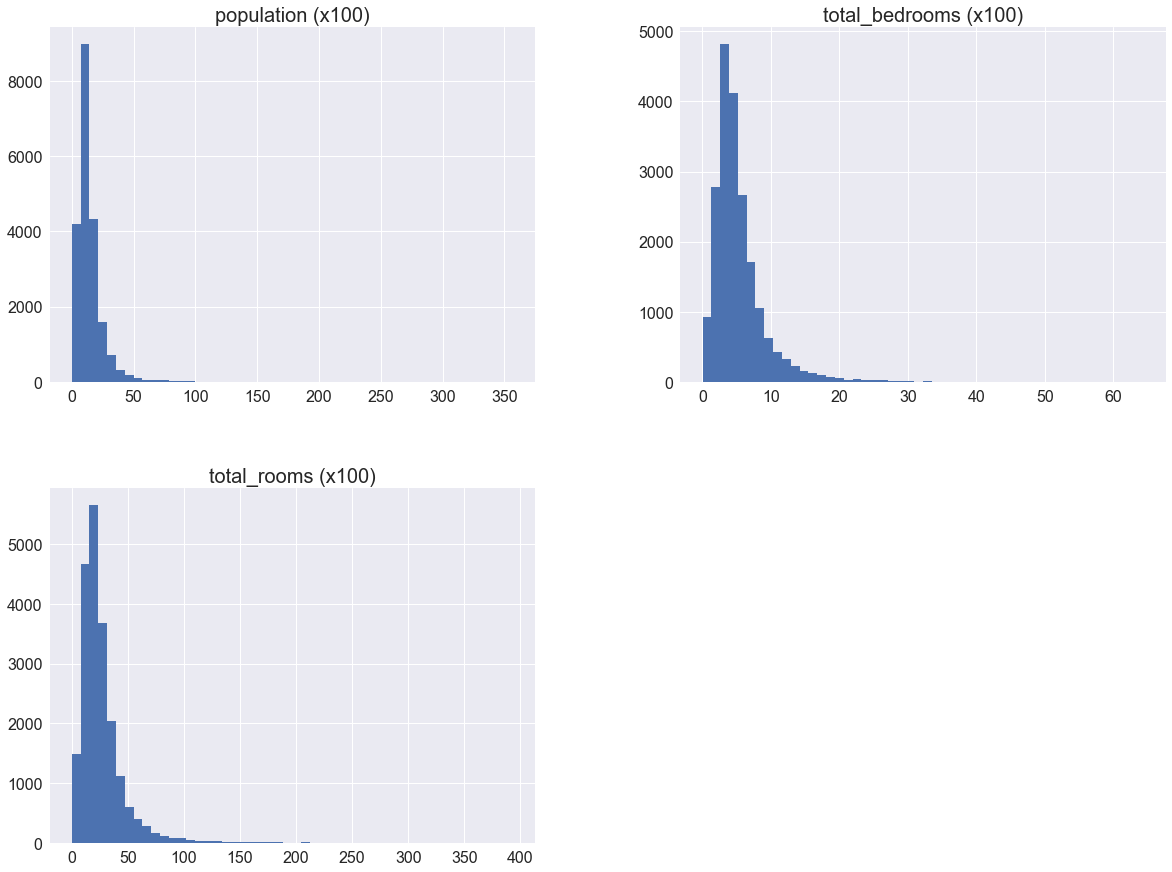

In [205]:
dfnocoord["total_bedrooms (x100)"] = df.total_bedrooms/100
dfnocoord[["total_rooms (x100)", "population (x100)", "total_bedrooms (x100)"]].hist(bins=50,figsize=(20,15))


params = {'axes.titlesize':'20',
          'xtick.labelsize':'16',
          'ytick.labelsize':'16'}
plt.rcParams.update(params)
plt.savefig("Distributionsx100")
plt.show()

Notice that it doesn't include ocean_proximity field since it is a categorial data

* Notice that some attributes are capped.
* Also check that income and median_house_value are scaled (1 represents 10,000 USD). Sometimes data is preprocessed.
* Many histograms are heavy-tailed


In [197]:
list(dfnocoord)

['housing_median_age',
 'total_bedrooms',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'total_rooms (x100)',
 'population (x100)']

In [206]:


Names = ["Median House Value","Median Income","Latitude",  "Housing median age",
         "Total Bedrooms", "Households", "Population", "Total Rooms"]
dfnocoordt = dfnocoord[["median_house_value","median_income", "latitude", "housing_median_age",
                        "total_bedrooms", "households", "population (x100)", "total_rooms (x100)" ]]
dfnocoordt.columns = Names
Attribute_corr = dfnocoordt.corr(method = "pearson")
Attribute_corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#plt.savefig("Correlation")
#Attribute_corr.median_house_value.sort_values(ascending=False)
#Attribute_corr[["median_house_value", "median_income","housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]]

,Median House Value,Median Income,Latitude,Housing median age,Total Bedrooms,Households,Population,Total Rooms
Median House Value,1,0.69,-0.14,0.11,0.05,0.066,-0.025,0.13
Median Income,0.69,1,-0.08,-0.12,-0.0077,0.013,0.0048,0.2
Latitude,-0.14,-0.08,1,0.011,-0.067,-0.071,-0.11,-0.036
Housing median age,0.11,-0.12,0.011,1,-0.32,-0.3,-0.3,-0.36
Total Bedrooms,0.05,-0.0077,-0.067,-0.32,1,0.98,0.88,0.93
Households,0.066,0.013,-0.071,-0.3,0.98,1,0.91,0.92
Population,-0.025,0.0048,-0.11,-0.3,0.88,0.91,1,0.86
Total Rooms,0.13,0.2,-0.036,-0.36,0.93,0.92,0.86,1


In [203]:
dfchanged = dfnocoord.drop(["total_rooms (x100)","population (x100)","households","total_bedrooms"], axis = 1)
dfchanged["rooms_phousehold"] = dfnocoord["total_rooms (x100)"] / dfnocoord["households"]
dfchanged["bedrooms_proom"] = dfnocoord["total_bedrooms"] / dfnocoord["total_rooms (x100)"]
dfchanged["pop_phousehold"] = dfnocoord["population (x100)"] / dfnocoord["households"]
Newnames =["Median House Value","Median Income", "Housing median age",
          "Rooms per households","Bedrooms per room", "Population per household"]
dfchangedt = dfchanged[["median_house_value", "median_income","housing_median_age","rooms_phousehold",
                        "bedrooms_proom", "pop_phousehold"]]
dfchangedt.columns = Newnames
Attribute_corr = dfchangedt.corr(method = "pearson")
Attribute_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Median House Value,Median Income,Housing median age,Rooms per households,Bedrooms per room,Population per household
Median House Value,1,0.69,0.11,0.15,-0.26,-0.024
Median Income,0.69,1,-0.12,0.33,-0.62,0.019
Housing median age,0.11,-0.12,1,-0.15,0.14,0.013
Rooms per households,0.15,0.33,-0.15,1,-0.42,-0.0049
Bedrooms per room,-0.26,-0.62,0.14,-0.42,1,0.0029
Population per household,-0.024,0.019,0.013,-0.0049,0.0029,1


# Data combinations

In some cases by combining different attributes we can get new attributes that may have a better correlation.

In [139]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

Attribute_corr_com = df.corr()
Attribute_corr_com.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

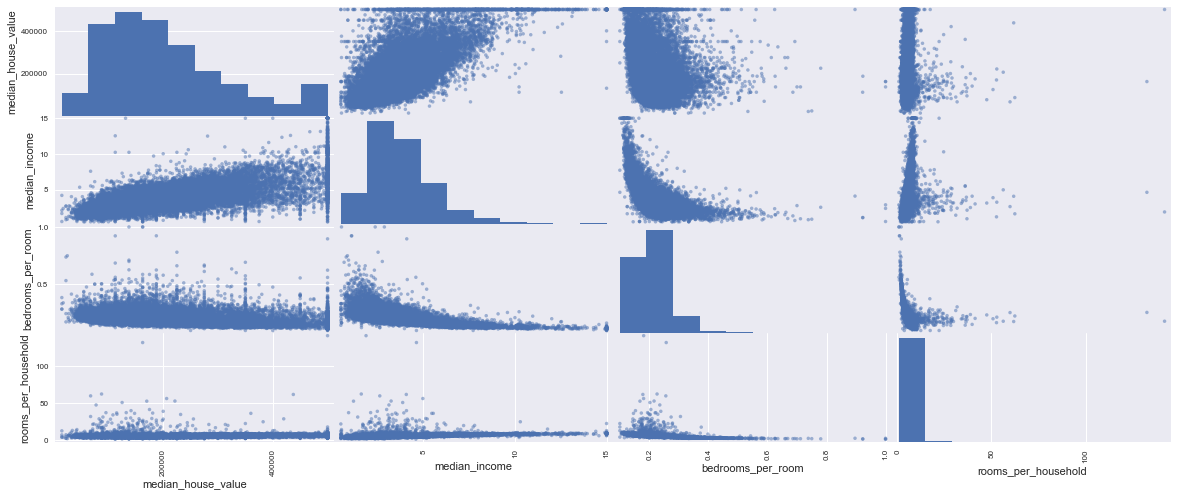

In [188]:
scatter_matrix(df[["median_house_value", "median_income", "bedrooms_per_room","rooms_per_household"]], figsize=(20, 8))
params = {'axes.titlesize':'20',
          'xtick.labelsize':'16',
          'ytick.labelsize':'16'}
plt.rcParams.update(params)
plt.savefig("scatter_matrix")
plt.show()

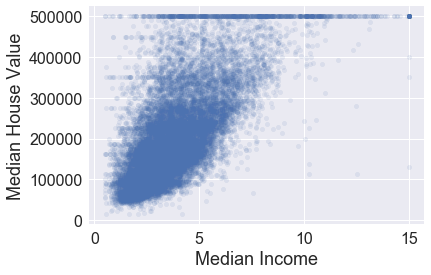

In [194]:
df.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

plt.xlabel("Median Income", fontsize = 18)
plt.ylabel("Median House Value", fontsize = 18)

If we plot our coordinates

In [182]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


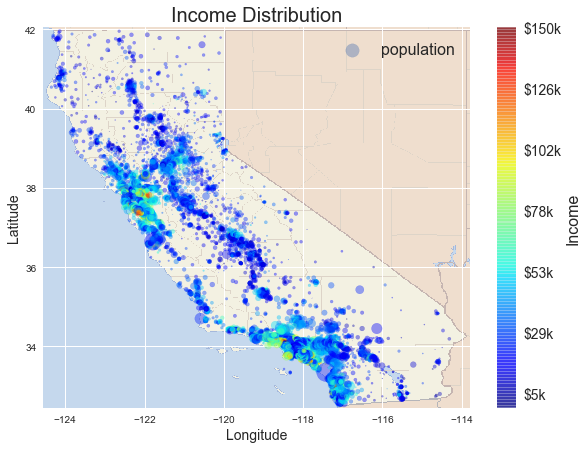

In [184]:
#Scatter of house prices

axincome = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), alpha=0.4,
    s=df["population"]/100,label="population",
    c="median_income", cmap=plt.get_cmap("jet"), colorbar=False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#California image as background
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
lowest = df.median_income.min()
Highest = df.median_income.max()
tick_values = np.linspace(lowest, Highest, 7, endpoint=True)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v*10)) for v in tick_values], fontsize=14)
cbar.set_label('Income', fontsize=16)
plt.title("Income Distribution", fontsize = 20)
plt.legend(fontsize=16)
plt.savefig("Housing_income_distribution")
plt.show()

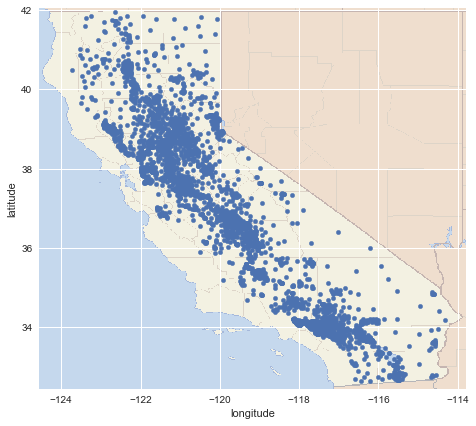

In [174]:
#Understanding more our distributions
#df.plot.scatter(x="longitude", y="latitude",  figsize=(10,7))
#df[df.ocean_proximity == "OCEAN"].plot(kind="scatter", x="longitude", y="latitude",  figsize=(10,7))
df[df.ocean_proximity == "INLAND"].plot(kind="scatter", x="longitude", y="latitude",  figsize=(10,7))
#df[df.ocean_proximity == "NEAR OCEAN"].plot(kind="scatter", x="longitude", y="latitude",  figsize=(10,7))
#df[df.ocean_proximity == "ISLAND"].plot(kind="scatter", x="longitude", y="latitude",  figsize=(10,7))
california_img=mpimg.imread("california.png")
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

We plot them on california image

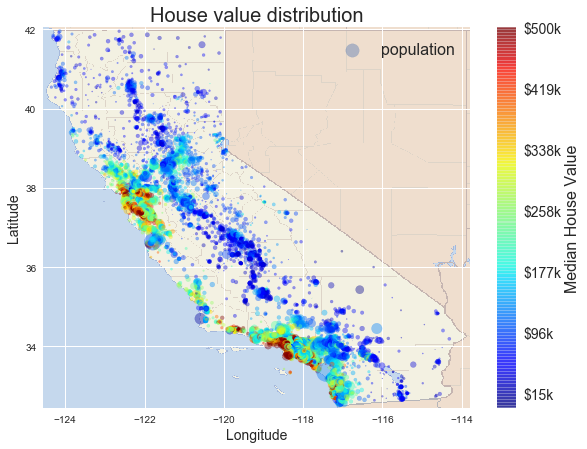

In [186]:
#Scatter of house prices
ax = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100,label="population",  figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False,
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

#California image as background
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

#Median House value bar
cheapest = df.median_house_value.min()
most_expensive = df.median_house_value.max()
tick_values = np.linspace(cheapest, most_expensive, 7, endpoint=True)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.title("House value distribution", fontsize = 20)
plt.legend(fontsize=16)
plt.savefig("Housing_prices_Caliornia")
plt.show()